<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/2348569_Prg7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# **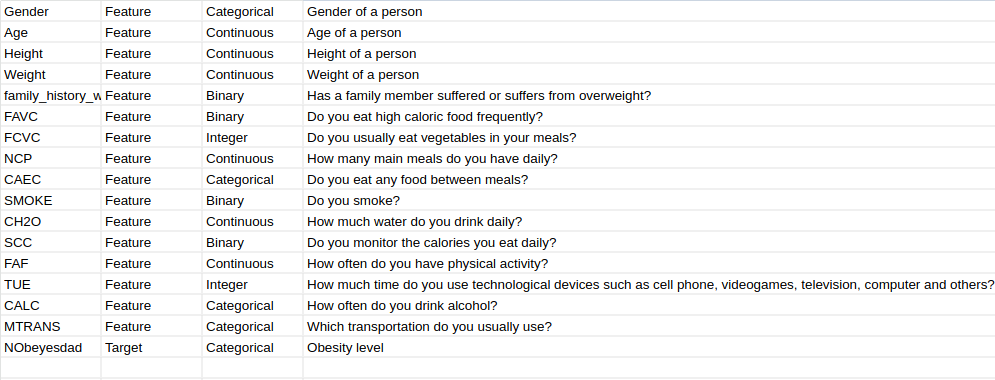Data Preprocessing**

In [3]:
df.shape

(2111, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

As we can see, there are no null values. Hence we check for outliers in the integer or floating type objects.

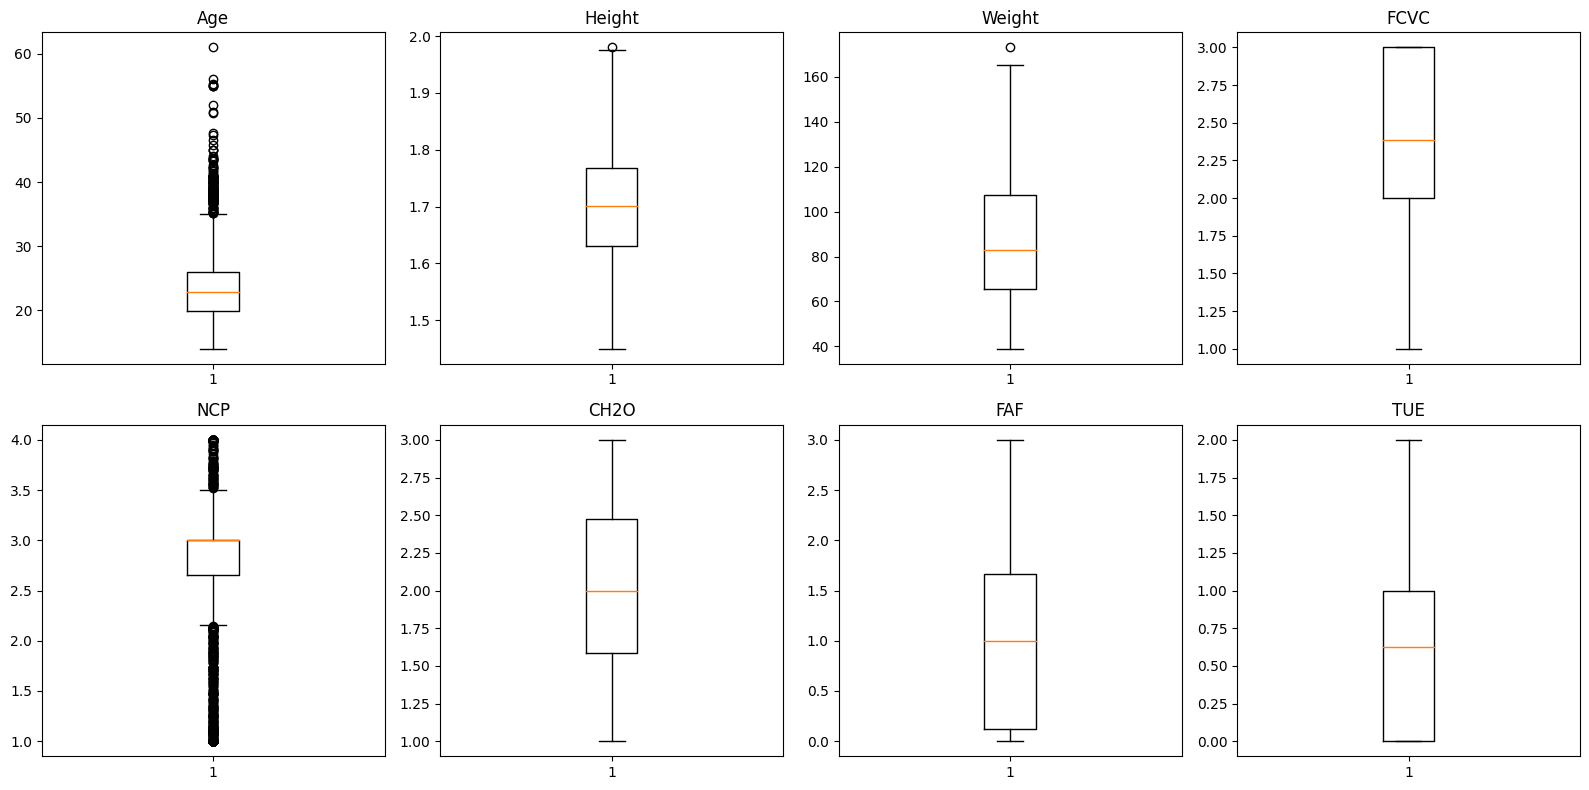

In [6]:
features = df.select_dtypes(include='float64').columns
num_attributes = len(features)
num_cols = 4
num_rows = -(-num_attributes // num_cols)

fig_width = 4 * num_cols
fig_height = 4 * num_rows


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))


axes = axes.flatten()

for i, col in enumerate(features):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

plt.tight_layout()

plt.show()

As we can see, there are not much outliers which can be neglected.

# **Label Encoding of categorical variables**

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
cat_features = df.select_dtypes(include='object').columns
for column in cat_features:
    df[column] = le.fit_transform(df[column])

We are performing Label Encoding in order to encode the categorical variables into numerical variables. This is done to avoid dropping of the categorical variables because k-means clustering cannot work on categorical variables and only numerical values.

In [9]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [10]:
df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,3.015632
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,1.952090
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


In [11]:
df = df.drop(['NObeyesdad'], axis=1) #Target variable not required for clustering

# **Applying standardization**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# **Applying k-means clustering**

In [13]:
from sklearn.cluster import KMeans
k_values = [2, 3, 4, 5, 6]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Set the desired number of clusters (K)
    df['Cluster'+ str(k)] = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [14]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,...,0,0.0,1.0,3,3,0,2,2,3,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,...,1,3.0,0.0,2,3,0,2,3,4,4
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,...,0,2.0,1.0,1,3,1,1,0,2,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,...,0,2.0,0.0,1,4,0,2,2,2,3
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,...,0,0.0,0.0,2,3,0,2,2,2,3


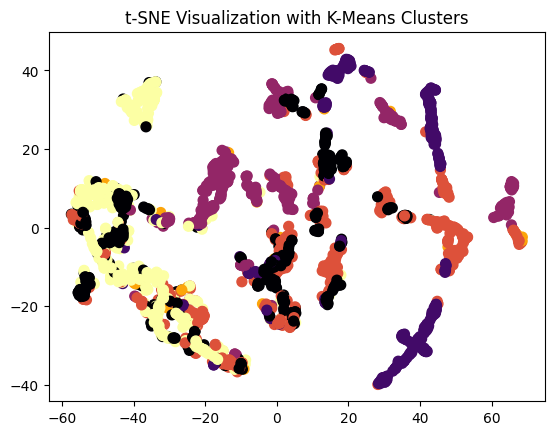

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(df.drop(['Cluster'+str(k) for k in k_values], axis=1))

# Plot t-SNE visualization colored by K-Means clusters
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=df['Cluster' + str(k_values[-1])], cmap='inferno', s=50)
plt.title('t-SNE Visualization with K-Means Clusters')
plt.show()

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that is often used for visualizing high-dimensional data in a lower-dimensional space. When combined with K-Means clustering, it can provide insights into the grouping of data points in a reduced-dimensional space.

# **Applying PCA to visualize in 2D**

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_df)

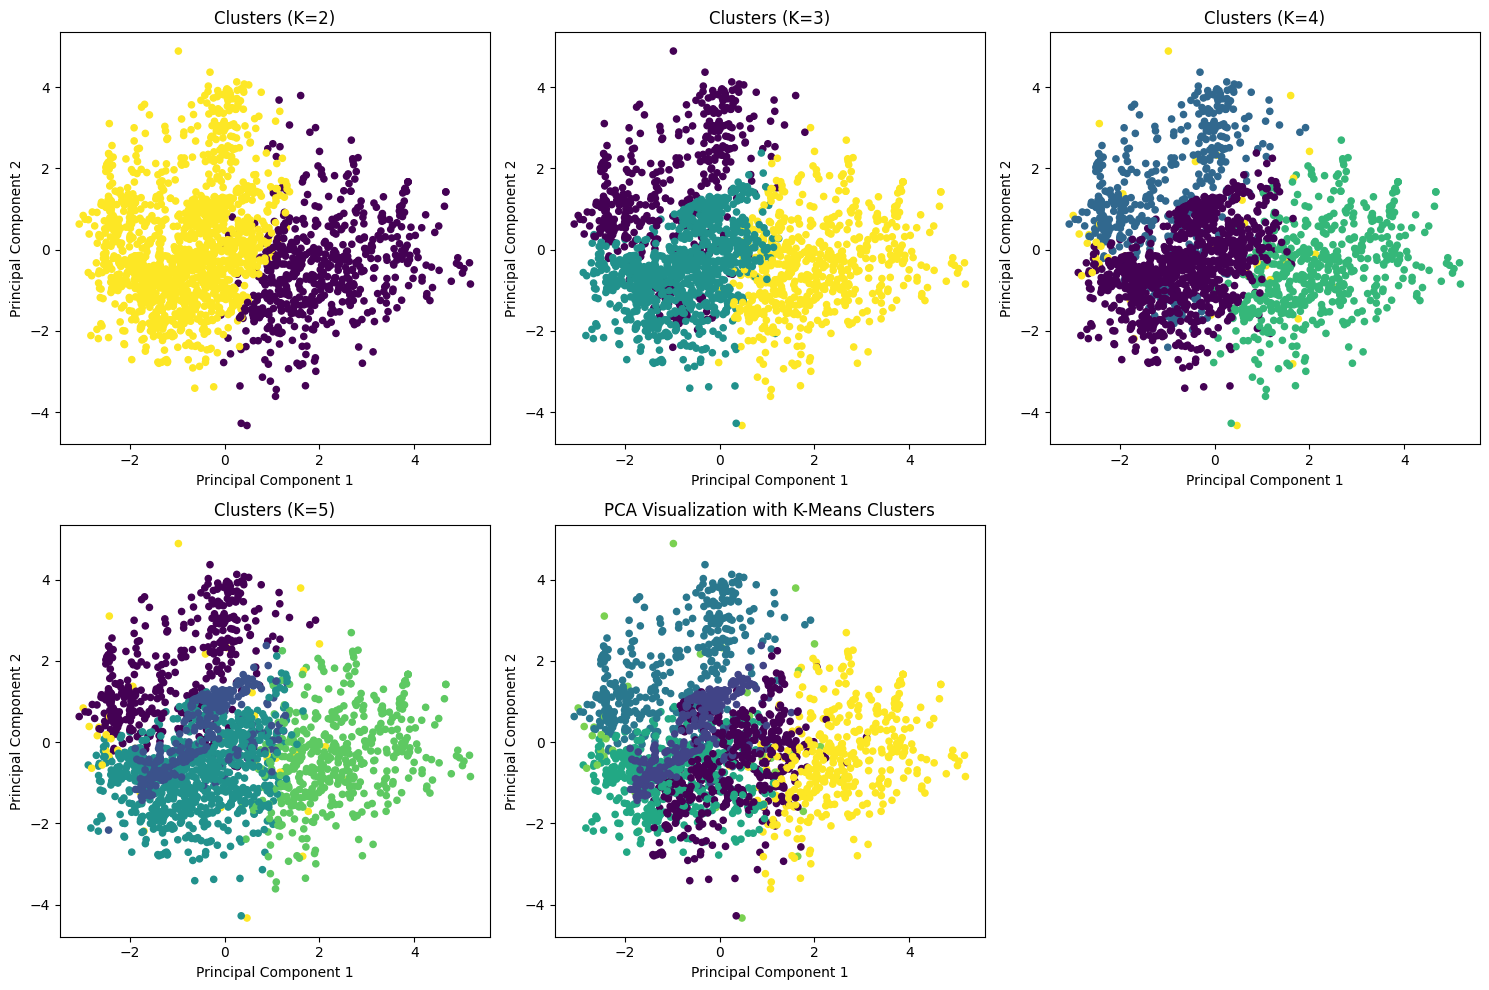

In [22]:
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    plt.subplot(2, 3, i)
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['Cluster' + str(k)], cmap='viridis', s=20)
    plt.title(f'Clusters (K={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with K-Means Clusters')
plt.tight_layout()
plt.show()

PCA (Principal Component Analysis) is used for visualization in K-Means clustering due to its ability to reduce the dimensionality of the data while preserving major patterns and global structures. It is computationally efficient, interpretable, and stable, making it suitable for exploring large datasets. However, its linearity may limit capturing intricate local structures or non-linear relationships present in the data.

# **Using Elbow method to optimize the number of clusters**

In [23]:
# Use the Elbow method to find the optimal number of clusters
inertia_values = []
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

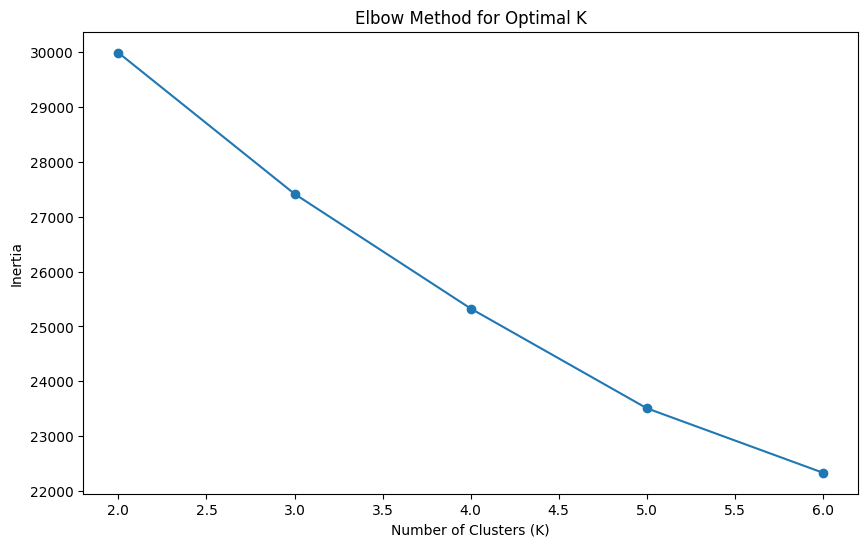

In [24]:
# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(2,7), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

The elbow method is a technique used to determine the optimal number of clusters (K) in K-Means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and identifying the "elbow" point, where adding more clusters yields diminishing returns in reducing WCSS. The optimal K is often chosen at this elbow point, providing a balance between model complexity and data fitting.